# DM_Halos and DM_IGM
Splitting $\langle DM_{cosmic}\rangle$ into its constituents.

In [12]:
# imports
from importlib import reload
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

from astropy import units as u

from frb.halos import ModifiedNFW
from frb import halos as frb_halos
from frb import igm as frb_igm
from frb.figures import utils as ff_utils

from matplotlib import pyplot as plt

In [8]:
plt.rcParams['font.size'] = 17

## $\langle \rho_{diffuse, cosmic}\rangle$
Use `f_diffuse` to calculate the average mass fraction of diffuse gas and  diffuse gas density (physical). Math described in [DM_cosmic.ipynb](DM_cosmic.ipynb).

In [11]:
help(frb_igm.f_diffuse)

Help on function f_diffuse in module frb.igm:

f_diffuse(z, cosmo=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), return_rho=False)
    Calculate the cosmic fraction of baryons
    in diffuse gas phase based on our empirical
    knowledge of baryon distributions and their 
    ionization state.
    
    Args:
      z: float or ndarray
        Redshift
      cosmo: astropy Cosmology, optional
        Cosmology of the universe.
      return_rho: bool, optional
        If true, the diffuse gas density
        is returned too.
    Returns:
      f_diffuse: float, ndarray
        Diffuse gas baryon fraction.
      rho_diffuse: astropy quantity
        Physical diffuse gas density.
        Returned if return_rho
        is set to true.



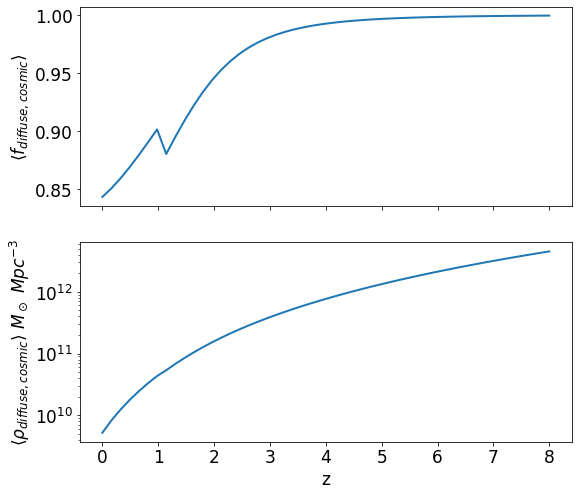

In [35]:
# Define redshifts
zvals = np.linspace(0, 8)

# Get <n_e>
f_diffuse, rho_diffuse = frb_igm.f_diffuse(zvals, return_rho = True)

# Plot
fig, axs = plt.subplots(2,1, sharex=True, figsize = (8,7))
fig.tight_layout()
ax1 = axs[0]
ax1.plot(zvals, f_diffuse, lw=2)
ax1.set_ylabel(r'$\langle f_{diffuse, cosmic}\rangle$')

ax2 = axs[1]
ax2.plot(zvals, rho_diffuse.to('Msun*Mpc**-3'), lw=2)
ax2.set_yscale("log")
ax2.set_xlabel('z')
ax2.set_ylabel(r'$\langle \rho_{diffuse, cosmic}\rangle$ $M_\odot~Mpc^{-3}$')
plt.show()

## $\langle n_{e,cosmic}\rangle$ 

In [2]:
help(frb_igm.ne_cosmic)

Help on function ne_cosmic in module frb.igm:

ne_cosmic(z, cosmo=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), mu=1.3333333333333333)
    Calculate the average cosmic electron
    number density as a function of redshift.
    Args:
      z: float or ndarray
        Redshift
      cosmo: astropy Cosmology, optional
        Cosmology in which the calculations
        are to be performed.
    Returns:
      ne_cosmic: astropy Quantity
        Average physical number density of
        electrons in the unverse in cm^-3.



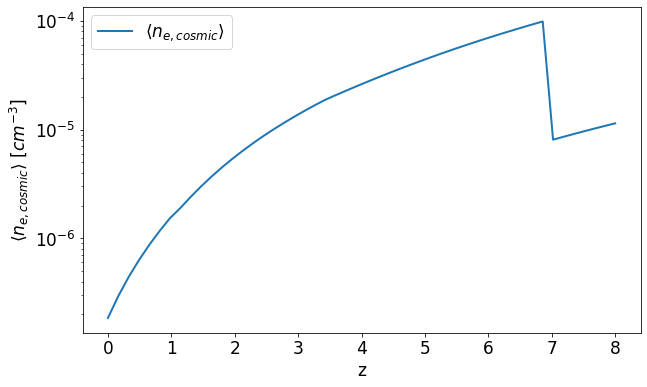

In [36]:
# Define redshifts
zvals = np.linspace(0, 8)

# Get <n_e>
avg_ne = frb_igm.ne_cosmic(zvals)

# Visualize
fig = plt.figure(figsize = (10, 6))

plt.plot(zvals, avg_ne, label=r'$\langle n_{e, cosmic}\rangle$', lw=2)
plt.yscale("log")
plt.legend(loc = "upper left")
plt.xlabel('z')
plt.ylabel(r'$\langle n_{e, cosmic}\rangle$ [$cm^{-3}$]')
plt.show()

# $\langle DM_{cosmic}\rangle$

See [DM_cosmic.ipynb](DM_cosmic.ipynb) for details regarding its computation.

In [40]:
help(frb_igm.average_DM)

Help on function average_DM in module frb.igm:

average_DM(z, cosmo=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), cumul=False, neval=10000, mu=1.3333333333333333)
    Calculate the average cosmic DM 'expected' based on our empirical
    knowledge of baryon distributions and their ionization state.
    
    This includes both the IGM and galactic halos, i.e. any and all diffuse gas
    
    Args:
        z: float
          Redshift
        mu: float
          Reduced mass correction for He when calculating n_H
        cumul: bool, optional
          Return the DM as a function of z
    
    Returns:
        Quantity (cumul=False) or Quantity, ndarray (cumul=True): DM, zeval



In [37]:
DM_cosmic, zvals = frb_igm.average_DM(8, cumul=True)

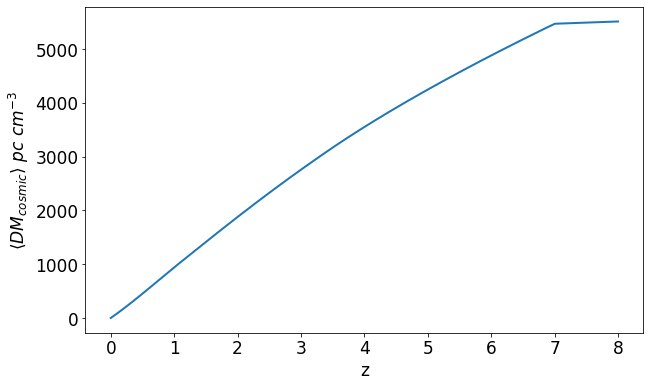

In [39]:
# Visualize
fig = plt.figure(figsize = (10, 6))

plt.plot(zvals, DM_cosmic, lw=2)
plt.xlabel('z')
plt.ylabel(r'$\langle DM_{cosmic}\rangle$ $pc~cm^{-3}$')
plt.show()

# $\langle DM_{halos}\rangle$ and $\langle DM_{IGM}\rangle$

The fraction of free electrons present in halos should be equal to the fraction of diffuse gas in halos assuming the ionization state of the individual species is only dependent on redshift (and not gas density as well).  
$$
\begin{aligned}
\frac{\langle n_{e, halos}\rangle}{\langle n_{e, cosmic}\rangle} & = \frac{\rho_{diffuse,halos}}{\rho_{diffuse,cosmic}}\\
& = \frac{\rho_{b, halos}f_{hot}}{\rho_{b, cosmic}f_{diffuse, cosmic}}\\
\end{aligned}
$$
Here $\rho_b$ refers to baryon density. $f_{hot}$ refers to the fraction of baryons in halos that is in the hot phase ($\sim10^7$ K). The remaining baryons are either in the neutral phase or in dense objects like stars. Assuming halos have the same baryon mass fraction as the universal average ($\Omega_b/\Omega_M$)
$$
\begin{aligned}
\frac{\langle n_{e, halos}\rangle}{\langle n_{e, cosmic}\rangle} & = \frac{\rho_{m, halos}f_{hot}}{\rho_{m, cosmic}f_{diffuse, cosmic}}\\
& = \frac{f_{halos} f_{hot}}{f_{diffuse, cosmic}}\\
\end{aligned}
$$
$f_{halos}$ can be computed as a function of redshift by integrating the halo mass function (HMF) times mass over some mass range and dividing it by the density of matter in the universe. This allows us to compute a line of sight integral of $\langle n_{e, halos} \rangle$ to get $\langle DM_{halos}\rangle$. $\langle DM_{IGM}\rangle$ is just obtained by subtracting this from $\langle DM_{cosmic}\rangle$.

Apart from $f_{hot}$ being an obvious free parameter, we also allow variation in the radial extent of halos. This is encoded in the parameter $r_{max}$ which is the radial extent of halos in units of $r_{200}$. Setting $r_{max}>1$ (for all halos; currently it is mass independent) smoothly extends the NFW profile and the modifid profile of the encased diffuse baryons.  

In [46]:
help(frb_igm.average_DMhalos)

Help on function average_DMhalos in module frb.igm:

average_DMhalos(z, cosmo=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), f_hot=0.75, rmax=1.0, logMmin=10.3, neval=10000, cumul=False)
    Average DM_halos term from halos along the sightline to an FRB
    
    Args:
        z: float
          Redshift of the FRB
        cosmo: astropy Cosmology
          Cosmology in which the calculations
          are to be performed.
        f_hot: float, optional
          Fraction of the halo baryons in diffuse phase.
        rmax: float, optional
          Size of a halo in units of r200
        logMmin: float, optional
          Lowest mass halos to consider
          Cannot be much below 10.3 or the Halo code barfs
          The code deals with h^-1 factors, i.e. do not impose it yourself
        neval: int, optional
          Number of redshift values between
          0 and z the function is evaluated at.
    

In [60]:
# evaluation
frb_igm.average_DMhalos(0.1)

<Quantity 38.1178615 pc / cm3>

In [62]:
# get cumulative DM_halos
dm, zvals = frb_igm.average_DMhalos(0.1, cumul = True)
dm

<Quantity [3.80042185e-03, 7.60084772e-03, 1.14012776e-02, ...,
           3.81102320e+01, 3.81140467e+01, 3.81178615e+01] pc / cm3>

In [63]:
zvals

array([0.00000000e+00, 1.00010001e-05, 2.00020002e-05, ...,
       9.99799980e-02, 9.99899990e-02, 1.00000000e-01])

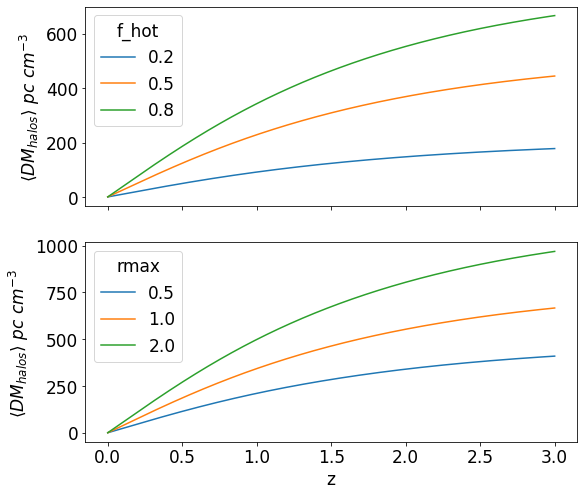

In [56]:
fhot_array = [0.2, 0.5, 0.75]
rmax_array = [0.5, 1.0 , 2.0]


# <DM_halos> for different f_hot
fig, axs = plt.subplots(2,1, sharex=True, figsize = (8,7))
fig.tight_layout()
ax1 = axs[0]

for f_hot in fhot_array:
    DM_halos, zeval = frb_igm.average_DMhalos(3, f_hot = f_hot, cumul=True)
    ax1.plot(zeval, DM_halos, label="{:0.1f}".format(f_hot))
ax1.legend(title="f_hot")
ax1.set_ylabel(r'$\langle DM_{halos}\rangle$ $pc~cm^{-3}$')

# <DM_halos> for different rmax
ax2 = axs[1]
for rmax in rmax_array:
    DM_halos, zeval = frb_igm.average_DMhalos(3, rmax = rmax, cumul = True)
    ax2.plot(zeval, DM_halos, label="{:0.1f}".format(rmax))
ax2.legend(title="rmax")
ax2.set_xlabel('z')
ax2.set_ylabel(r'$\langle DM_{halos}\rangle$ $pc~cm^{-3}$')
plt.show()

In [57]:
# Limits of calculation
frb_igm.average_DMhalos(3.1)

<Quantity 674.37469874 pc / cm3>

In [58]:
# Failure above redshift 5
frb_igm.average_DMhalos(5.1)

Exception: Redshift greater than 5.

In [59]:
help(frb_igm.average_DMIGM)

Help on function average_DMIGM in module frb.igm:

average_DMIGM(z, cosmo=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), f_hot=0.75, rmax=1.0, logMmin=10.3, neval=10000, cumul=False)
    Estimate DM_IGM in a cumulative fashion
    
    Args:
        z: float
          Redshift of the FRB
        cosmo: astropy Cosmology
          Cosmology in which the calculations
          are to be performed.
        f_hot: float, optional
          Fraction of the halo baryons in diffuse phase.
        rmax: float, optional
          Size of a halo in units of r200
        logMmin: float, optional
          Lowest mass halos to consider
          Cannot be much below 10.3 or the Halo code barfs
          The code deals with h^-1 factors, i.e. do not impose it yourself
        neval: int, optional
          Number of redshift values between
          0 and z the function is evaluated at.
        cumul: bool, optional
 

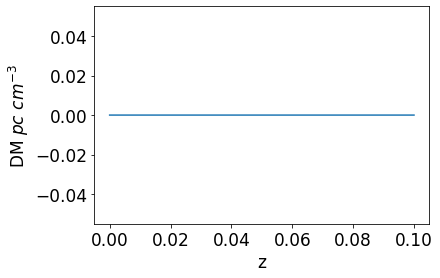

In [64]:
# Sanity check. <DM_cosmic> - (<DM_halos> + <DM_IGM) = 0
dm, zvals = frb_igm.average_DM(0.1, cumul= True)
dm_halos, _ = frb_igm.average_DMhalos(0.1, cumul = True)
dm_igm, _ = frb_igm.average_DMIGM(0.1, cumul = True)

plt.plot(zvals, dm - dm_halos - dm_igm)
plt.ylabel(r"DM $pc~cm^{-3}$")
plt.xlabel("z")
plt.show()